In [82]:
import pandas as pd
import numpy as np

In [90]:
window = (900, 4000)

SEARCH_DIR = Path("salmon/io/2021-05-26-search")
_dfs = {f: pd.read_csv(f) for f in SEARCH_DIR.glob("*.csv.zip")}

ARR = Path("salmon/io/2021-05-25/ARR-1_responses.csv.zip")
_dfs.update({ARR: pd.read_csv(ARR)})

stats = []
for k, _df in _dfs.items():
    if "TSTE" in k.name:
        n_search = str(k.name).replace("TSTE-n_search=", "").replace("-1_responses.csv.zip", "")
    else:
        n_search = -1
    print(n_search)
    _df["n_search"] = int(n_search)

    __d = _df.iloc[window[0]:window[1]][["head", "left", "right"]]
    __kids = __d.melt(id_vars="head")[["head", "value"]]
    nuniq = __kids.groupby("head")["value"].nunique()
    
    stat = {
        "uniq_kids__mean": nuniq.mean(),
        "uniq_kids__median": nuniq.median(),
        "uniq_kids__min": nuniq.min(),
        "uniq_kids__max": nuniq.max(),
        "n_search": int(n_search)
    }
    stat.update({f"uniq_kids__p{k}": np.percentile(nuniq, k) for k in range(100)})
    stats.append(stat)

10000
3000
100
300000
300
1000
30
100000
30000
-1


In [91]:
df = pd.DataFrame(stats)
df.describe()

,uniq_kids__mean,uniq_kids__median,uniq_kids__min,uniq_kids__max,n_search,uniq_kids__p0,uniq_kids__p1,uniq_kids__p2,uniq_kids__p3,uniq_kids__p4,...,uniq_kids__p90,uniq_kids__p91,uniq_kids__p92,uniq_kids__p93,uniq_kids__p94,uniq_kids__p95,uniq_kids__p96,uniq_kids__p97,uniq_kids__p98,uniq_kids__p99
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,18.935103,7.350000,3.700000,71.600000,44442.900000,3.700000,3.878000,3.900000,3.9670,4.000000,...,60.040000,60.633000,61.248000,62.122000,62.718000,63.280000,64.040000,65.582000,67.680000,69.174000
std,6.764706,7.860061,5.375872,18.542444,95019.522729,5.375872,5.938757,6.008328,6.2202,6.324555,...,22.822075,22.601016,22.498962,21.896276,21.520963,21.305271,21.101473,20.145418,19.273002,19.095784
min,10.947368,4.000000,2.000000,41.000000,-1.000000,2.000000,2.000000,2.000000,2.0000,2.000000,...,35.500000,36.000000,36.000000,37.000000,37.000000,37.000000,37.000000,37.660000,39.000000,39.220000
25%,13.311959,4.000000,2.000000,58.500000,150.000000,2.000000,2.000000,2.000000,2.0000,2.000000,...,39.100000,39.877500,40.620000,43.085000,44.050000,44.862500,47.110000,50.027500,53.415000,55.545000
50%,17.327731,4.500000,2.000000,76.500000,2000.000000,2.000000,2.000000,2.000000,2.0000,2.000000,...,54.050000,55.925000,57.360000,58.250000,59.490000,60.325000,61.160000,63.975000,67.780000,71.010000
75%,24.965557,6.000000,2.000000,88.250000,25000.000000,2.000000,2.000000,2.000000,2.0000,2.000000,...,84.250000,84.290000,84.480000,84.670000,84.750000,85.175000,85.740000,85.750000,86.770000,87.680000
max,29.688889,29.500000,19.000000,89.000000,300000.000000,19.000000,20.780000,21.000000,21.6700,22.000000,...,88.000000,88.150000,88.800000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000


(0.0, 90.0)

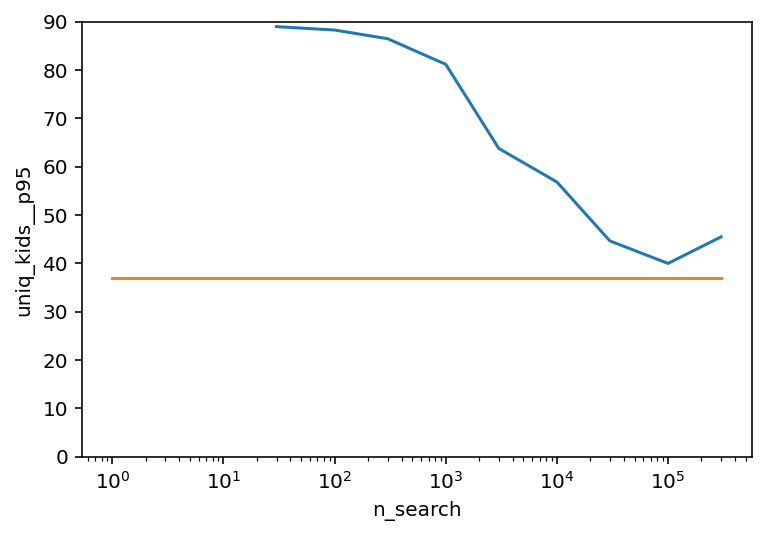

In [95]:
import seaborn as sns

y = "uniq_kids__p95"
ax = sns.lineplot(
    y=y,
    x="n_search",
    data=df[df.n_search > 0],
)

ax.set_xscale("log", base=10)
arr = df[df.n_search == -1]
assert len(arr) == 1
ax.plot([1, 300_000], [arr[y], arr[y]])
ax.set_ylim(0, 90)